# Dataset : bioinf.nl/~davelangers/datasets/abstract.zip

In [3]:
import abstracts

ImportError: cannot import name '_remove_long_seq' from 'tensorflow.keras.preprocessing.sequence' (/commons/conda/lib/python3.8/site-packages/tensorflow/keras/preprocessing/sequence/__init__.py)

In [ ]:
help(abstracts.load_data)

Help on function load_data in module abstracts:

load_data(path='abstracts.npz', num_words=None, skip_top=0, maxlen=None, test_split=0.2, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
    Loads the PubMed abstracts classification dataset.
    
    This is a dataset of 4,908 abstracts from PubMed, labeled over 2 journals.
    
    Each abstract is encoded as a list of word indexes (integers).
    For convenience, words are indexed by overall frequency in the dataset,
    so that for instance the integer "3" encodes the 3rd most frequent word in
    the data. This allows for quick filtering operations such as:
    "only consider the top 10,000 most
    common words, but eliminate the top 20 most common words".
    
    As a convention, "0" does not stand for a specific word, but instead is used
    to encode any unknown word.
    
    Args:
      path: where to cache the data (relative to `~/.keras/dataset`).
      num_words: integer or None. Words are
          ranked by h

In [ ]:
(x_train,y_train),(x_test,y_test)=abstracts.load_data(num_words=10000)

In [ ]:
x_train.shape,x_train.dtype

((3926,), dtype('O'))

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = abstracts.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

In [ ]:
decoded_review

'? reducing excessive ? tonic inhibition promotes functional recovery after stroke stroke is a leading cause of disability but no pharmacological therapy is currently available for promoting recovery the brain region adjacent to stroke ? ? ? critical for ? as it shows heightened ? allowing sensorimotor functions to ? from damaged areas thus understanding the neuronal properties constraining this plasticity is important for the development of new treatments here we show that after a stroke in mice tonic neuronal inhibition is increased in the ? zone this increased tonic inhibition is mediated by extrasynaptic gabaa receptors and is caused by an impairment in gaba γ-aminobutyric acid transporter ? ? function to counteract the heightened inhibition we administered in vivo a ? inverse agonist specific for ? extrasynaptic gabaa receptors at a delay after stroke this treatment produced an early and sustained recovery of motor function genetically lowering the number of α5 or ? gabaa receptor

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(x_train)
# Our vectorized test data
x_test = vectorize_sequences(x_test)

In [ ]:
y_train.shape,y_train.dtype

((3926,), dtype('int64'))

In [ ]:
y_test = y_test.astype("float")
y_train = y_train.astype("float")

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
neural = keras.models.Sequential()
neural.add(keras.layers.InputLayer(input_shape=(10000,),name="input"))
neural.add(keras.layers.Dense(units=64,activation=keras.activations.relu, name= "hidden_1"))
# 64*10000 + 64 bias
neural.add(keras.layers.Dense(units=16,activation=keras.activations.relu, name= "hidden_2"))
# 64 * 16 + 16 bias
neural.add(keras.layers.Dense(units=1,activation=keras.activations.sigmoid, name= "output")) # output cannot be negative
# 16 * 1 + 1 bias
neural.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 64)                640064    
                                                                 
 hidden_2 (Dense)            (None, 16)                1040      
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 641,121
Trainable params: 641,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
neural.compile(
    loss=keras.losses.BinaryCrossentropy(),
    # the score will be binary, so we use this one
    optimizer = keras.optimizers.SGD(),
    metrics = [keras.metrics.BinaryAccuracy(), keras.metrics.AUC()]
)
history = neural.fit(
        x = x_train,
        y = y_train,
        epochs = 8,
        batch_size = 50,
        # full batch learning => batch size = training size
        # online learning     => batch size = 1
        # mini-batch learning => batch size = 1 < batch_size < training size
        verbose = 0,
        validation_data =(x_test,y_test)
)

In [ ]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'auc_2', 'val_loss', 'val_binary_accuracy', 'val_auc_2'])

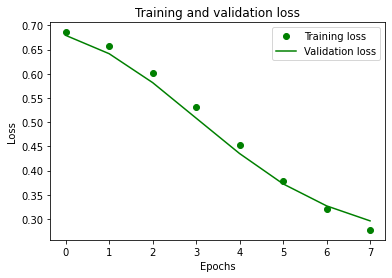

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"],"go",label="Training loss")
plt.plot(history.history["val_loss"],"g-",label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history["auc_2"],"ro",label="Training auc")
plt.plot(history.history["val_auc_2"],"r-",label="Validation auc")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("auc")
plt.legend()
plt.show()

KeyError: 'auc_2'

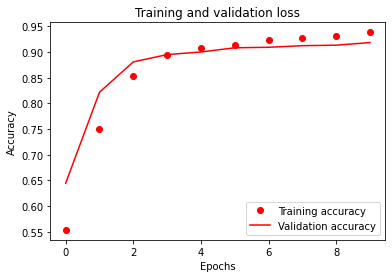

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history["binary_accuracy"],"ro",label="Training accuracy")
plt.plot(history.history["val_binary_accuracy"],"r-",label="Validation accuracy")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
yhat_test  = neural.predict(x_test)
label_test = np.round(yhat_test)
label_test

31/31 [==============================] - 0s 3ms/step


array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],

In [ ]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score,roc_auc_score
print(f'Acc = {accuracy_score(y_test,label_test):.3f}')
print(f'bAcc = {balanced_accuracy_score(y_test,label_test):.3f}')
print(f'AUC = {roc_auc_score(y_test,yhat_test):.3f}')

Acc = 0.914
bAcc = 0.914
AUC = 0.973


In [ ]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test,label_test)
conmat

array([[412,  45],
       [ 39, 486]])

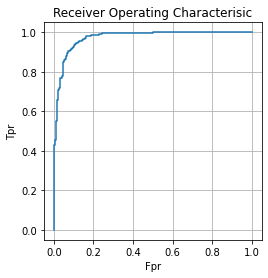

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr,_ = roc_curve(y_test,yhat_test)
plt.plot(fpr,tpr)
plt.title("Receiver Operating Characterisic")
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.grid(True)
plt.axis("square")
plt.show()